In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
import prepare

In [20]:
c = pd.read_json('c_data.json')
js = pd.read_json('js_data.json')
jv = pd.read_json('jv_data.json')
py = pd.read_json('py_data.json')
ru = pd.read_json('ru_data.json')

In [27]:
df = pd.concat([c,js,jv,py,ru]).reset_index(drop=True)

In [29]:
df.to_json('data.json')

In [31]:
df.isnull().sum()

repo                0
language           19
readme_contents     0
dtype: int64

In [2]:
url = 'https://github.com/search?q=stars%3A%3E5&type=Repositories'

In [3]:
requests.get(url)

<Response [429]>

In [231]:
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
# soup

In [232]:
repos = soup.select('a.v-align-middle')
repos[0]['href']

IndexError: list index out of range

In [47]:
names = []
for r in repos:
    repo_name = r['href']
    names.append(repo_name)

In [48]:
names

['/freeCodeCamp/freeCodeCamp',
 '/996icu/996.ICU',
 '/EbookFoundation/free-programming-books',
 '/jwasham/coding-interview-university',
 '/sindresorhus/awesome',
 '/kamranahmedse/developer-roadmap',
 '/public-apis/public-apis',
 '/vuejs/vue',
 '/facebook/react',
 '/tensorflow/tensorflow']

In [37]:
len(names)

25

In [8]:
def get_repo_names():
    names = []
    url = 'https://github.com/search?q=stars%3A%3E5&type=Repositories'
    soup = BeautifulSoup(requests.get(url).content, 'html.parser')
    repos = soup.select('a.v-align-middle')
    for r in repos:
        repo_name = r['href']
        names.append(repo_name)
    page = 2
    while page <= 10:
        url = f'https://github.com/search?p={page}&q=stars%3A%3E5&type=Repositories'
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
        repos = soup.select('a.v-align-middle')
        for r in repos:
            repo_name = r['href']
            names.append(repo_name)
        print('moving to page '+str(page))
        page += 1
    
    return names

In [9]:
test = get_repo_names()

moving to page 2
moving to page 3
moving to page 4
moving to page 5
moving to page 6
moving to page 7
moving to page 8
moving to page 9
moving to page 10


In [10]:
test

['/freeCodeCamp/freeCodeCamp',
 '/996icu/996.ICU',
 '/EbookFoundation/free-programming-books',
 '/jwasham/coding-interview-university',
 '/sindresorhus/awesome',
 '/kamranahmedse/developer-roadmap',
 '/public-apis/public-apis',
 '/donnemartin/system-design-primer',
 '/vuejs/vue',
 '/facebook/react',
 '/tensorflow/tensorflow',
 '/codecrafters-io/build-your-own-x',
 '/getify/You-Dont-Know-JS',
 '/twbs/bootstrap',
 '/CyC2018/CS-Notes',
 '/trekhleb/javascript-algorithms',
 '/ohmyzsh/ohmyzsh',
 '/TheAlgorithms/Python',
 '/vinta/awesome-python',
 '/torvalds/linux',
 '/airbnb/javascript',
 '/jackfrued/Python-100-Days',
 '/ossu/computer-science',
 '/ytdl-org/youtube-dl',
 '/jlevy/the-art-of-command-line',
 '/labuladong/fucking-algorithm',
 '/awesome-selfhosted/awesome-selfhosted',
 '/facebook/react-native',
 '/golang/go',
 '/electron/electron',
 '/awesome-selfhosted/awesome-selfhosted',
 '/facebook/react-native',
 '/golang/go',
 '/electron/electron',
 '/30-seconds/30-seconds-of-code',
 '/d3/d3

In [11]:
# df = acquire.scrape_github_data()
# pd.DataFrame(df)

In [3]:
df = pd.read_json('data.json')

In [4]:
df.isnull().sum()

repo                0
language           19
readme_contents     0
dtype: int64

In [5]:
df[df.language.isnull()]

,repo,language,readme_contents
4,/LingCoder/OnJava8,None,# 《On Java 8》中文版\n\n## 最新动态\n\n《ON JAVA 中文版》终于...
11,/thedaviddias/Front-End-Checklist,None,"<h1 align=""center"">\n<br>\n <img src=""https:/..."
31,/MunGell/awesome-for-beginners,None,# Awesome First PR Opportunities [![Awesome](h...
35,/prakhar1989/awesome-courses,None,# Awesome CS Courses [![Awesome](https://cdn.r...
46,/wsargent/docker-cheat-sheet,None,# Docker Cheat Sheet\n\n**Want to improve this...
65,/xitu/gold-miner,None,# 掘金翻译计划\n\n[![xitu](https://camo.githubuserco...
92,/ziadoz/awesome-php,None,# Awesome PHP ![](https://github.com/ziadoz/aw...
93,/Homebrew/legacy-homebrew,None,# Homebrew (Legacy)\n\nThis repository was dep...
114,/google/material-design-icons,None,## Material Icons / Material Symbols\n\nThese ...
116,/Developer-Y/cs-video-courses,None,# Computer Science courses with video lectures...


In [6]:
df_clean = prepare.clean_df(df,
                    ['readme_contents'],
                    'stemming',
                    extra_words=['\'', 'td', '&#9', 'a', 'br', '&#9;', 'use'])

In [7]:
# df = df.dropna()

In [8]:
df_clean.isnull().sum()

repo                     0
language                 0
readme_contents          0
readme_contents_clean    0
rm_length                0
sentiment                0
dtype: int64

In [9]:
df_clean.language.value_counts()

JavaScript    249
Python        227
Java          214
Ruby          204
Other          87
Name: language, dtype: int64

In [10]:
df_clean.shape

(981, 6)

In [15]:
# def create_other(df):
#     copy = df.language.copy()
#     output = []
#     for lang in copy:
#         if (lang != 'JavaScript') & (lang != 'Python') & (lang != 'Go'):
#             output.append('Other')
#         else:
#             output.append(lang)
#     return output

In [16]:
# # potentially for project use
# def clean_df(df, cols_to_clean, method='lemmatize', extra_words=[], exclude_words=[]):
#     d = df.copy()
#     for col in cols_to_clean:
#         d[col+'_clean'] = clean_data(d[col], method, extra_words, exclude_words)
#     return d

# def clean_data(col, method='lemmatize', extra_words=[], exclude_words=[]):
#     bc = [basic_clean(entry) for entry in col]   
#     t = [tokenize(entry) for entry in bc]
#     if method == 'lemmatize':
#         l = [lemmatize(entry) for entry in t]
#         return [remove_stopwords(entry, extra_words, exclude_words) for entry in l]
#     if method == 'stemming':
#         s = [stem(entry) for entry in t]
#         return [remove_stopwords(entry, extra_words, exclude_words) for entry in s]


# # backgroud functions used inside of above functions
# def basic_clean(text):
#     temp = text.lower()
#     temp = unicodedata.normalize('NFKD', temp).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     temp = re.sub(r'[^a-zA-Z0-9\'\s]', '', temp)
#     return temp

# def tokenize(text):
#     token = nltk.tokenize.ToktokTokenizer()
#     temp = token.tokenize(text, return_str=True)
#     return temp

# def stem(text):
#     ps = nltk.porter.PorterStemmer()
#     stems = [ps.stem(word) for word in text.split(' ')]
#     stemmed = ' '.join(stems)
#     return stemmed

# def lemmatize(text):
#     wnl = nltk.stem.WordNetLemmatizer()
#     lemons = [wnl.lemmatize(word) for word in text.split(' ')]
#     lemmatized = ' '.join(lemons)
#     return lemmatized

# def remove_stopwords(text, extra_words=[], exclude_words=[]):
#     words = text.split(' ')
#     stopwords_list = stopwords.words('english')
#     if len(extra_words) > 0:
#         stopwords_list.extend(extra_words)
#     if len(exclude_words) > 0:
#         [stopwords_list.remove(w) for w in exclude_words]
#     filtered_words = [word for word in words if word not in stopwords_list]
#     return ' '.join(filtered_words)

In [17]:
df_clean

,repo,language,readme_contents,readme_contents_clean
0,/facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...
1,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...,awesomeselfhosted\n\nawesomehttpscdnjsdelivrne...
2,/30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttps30secondsofcodeorgjsp1\n\n 30 ...
3,/facebook/create-react-app,JavaScript,# Create React App [![Build Status](https://de...,creat react app build statushttpsdevazurecomfa...
4,/vercel/next.js,JavaScript,packages/next/README.md,packagesnextreadmemd
...,...,...,...,...
252,/JohnCoates/Aerial,Other,"<p align=""center"">\n <img src=""https://cloud....",p aligncenter\n img srchttpscloudgithubusercon...
253,/OpenZeppelin/openzeppelin-contracts,JavaScript,"# <img src=""logo.svg"" alt=""OpenZeppelin"" heigh...",img srclogosvg altopenzeppelin height40px\n\nd...
256,/petkaantonov/bluebird,JavaScript,"<a href=""http://promisesaplus.com/"">\n <img...",hrefhttppromisesapluscom\n img srchttppromises...
257,/yichengchen/clashX,Other,"<h1 align=""center"">\n <img src=""https://githu...",h1 aligncenter\n img srchttpsgithubcomdreamacr...


In [11]:
all_words = ' '.join(df_clean['readme_contents_clean'])
js_words = ' '.join(df_clean[df_clean.language == 'JavaScript']['readme_contents_clean'])
ja_words = ' '.join(df_clean[df_clean.language == 'Java']['readme_contents_clean'])
py_words = ' '.join(df_clean[df_clean.language == 'Python']['readme_contents_clean'])
ru_words = ' '.join(df_clean[df_clean.language == 'Ruby']['readme_contents_clean'])
ot_words = ' '.join(df_clean[df_clean.language == 'Other']['readme_contents_clean'])

In [12]:
all_freq = pd.Series(all_words.split()).value_counts()
js_freq = pd.Series(js_words.split()).value_counts()
ja_freq = pd.Series(ja_words.split()).value_counts()
py_freq = pd.Series(py_words.split()).value_counts()
ru_freq = pd.Series(ru_words.split()).value_counts()
ot_freq = pd.Series(ot_words.split()).value_counts()

In [13]:
all_freq.head()

thi        6202
file       3926
run        3164
a          2929
support    2920
dtype: int64

In [14]:
js_freq.head()

javascript    1656
thi           1644
sourc         1234
file          1135
a             1122
dtype: int64

In [15]:
py_freq.head()

python    2085
thi       1432
video     1005
file       969
data       963
dtype: int64

In [16]:
ru_freq.head()

ruby    2004
end     1952
thi     1925
run     1207
file    1106
dtype: int64

In [17]:
ot_freq.head()

free     1099
build     955
rust      447
api       407
gener     375
dtype: int64

In [18]:
word_counts = pd.concat([js_freq, ja_freq, py_freq, ru_freq, ot_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['js', 'ja', 'py', 'ru', 'ot', 'all']
word_counts

,js,ja,py,ru,ot,all
javascript,1656,24,73,140,72,1965
thi,1644,829,1432,1925,372,6202
sourc,1234,148,318,270,229,2199
file,1135,411,969,1106,305,3926
a,1122,377,594,600,236,2929
...,...,...,...,...,...,...
docbook4,0,0,0,0,1,1
contexthttpswwwcontextgardennet,0,0,0,0,1,1
beamerhttpsctanorgpkgbeam,0,0,0,0,1,1
beamer,0,0,0,0,1,1


In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '% of lang for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

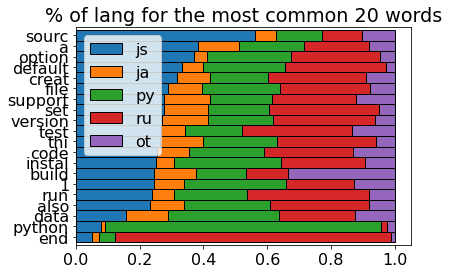

In [20]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'js')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of lang for the most common 20 words')

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
X = df_clean.readme_contents_clean
y = df_clean.language

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                 y_train,
                                                 test_size=.25,
                                                 random_state=123)
X_train.shape, X_val.shape, X_test.shape

((588,), (196,), (197,))

In [23]:
cv = CountVectorizer()
train_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_bow, y_train)
tree.score(train_bow, y_train)

0.8826530612244898

In [24]:
val_bow = cv.transform(X_val)
tree.score(val_bow, y_val)

0.7193877551020408

In [25]:
tv = TfidfVectorizer()
train_bow = tv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_bow, y_train)
tree.score(train_bow, y_train)

0.8656462585034014

In [26]:
val_bow = tv.transform(X_val)
tree.score(val_bow, y_val)

0.7295918367346939

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
tv = TfidfVectorizer(ngram_range=(2, 3))
train_bow = tv.fit_transform(X_train)
val_bow = tv.transform(X_val)

# cv = CountVectorizer(ngram_range=(2, 3))
# train_bow = cv.fit_transform(X_train)
# val_bow = cv.transform(X_val)

nb = MultinomialNB(alpha=1)
nb.fit(train_bow, y_train)
nb.score(train_bow, y_train), nb.score(val_bow, y_val)

(0.9744897959183674, 0.75)